In [43]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
from pathlib import Path
import numpy as np
%matplotlib inline

In [44]:
# Read the search data into a Dataframe
df_mercado_trends = pd.read_csv(
    Path('Resources/google_hourly_search_trends.csv'),
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [45]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [46]:

# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc['2020-05']

# Use hvPlot to visualize the data for May 2020
df_may_2020.hvplot()


:Curve   [Date]   (Search Trends)

In [47]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020.sum()

# View the traffic_may_2020 value
print(f'The MercadoLibre May 2020 {traffic_may_2020}')

The MercadoLibre May 2020 Search Trends    38181
dtype: int64


In [48]:
# Calcluate the monthly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby(by=[df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
print(f'Median Monthly Traffic {median_monthly_traffic}')


Median Monthly Traffic Search Trends    35172.5
dtype: float64


In [49]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
print(f'The ratio of May 2020 traffic to overall {traffic_may_2020 / median_monthly_traffic}')
print(f'MercadoLibre May 2020: {traffic_may_2020}')
print(f'MercadoLibre Median Monthy {median_monthly_traffic}')


The ratio of May 2020 traffic to overall Search Trends    1.085536
dtype: float64
MercadoLibre May 2020: Search Trends    38181
dtype: int64
MercadoLibre Median Monthy Search Trends    35172.5
dtype: float64


Google search traffic increased by about 8.5% during the month of May, the month that MercadoLibre released its financial results.

In [50]:
# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week 
df_mercado_trends_day = df_mercado_trends['Search Trends'].groupby(by=[df_mercado_trends.index.dayofweek]).mean()
df_mercado_trends_day.hvplot()


:Curve   [Date]   (Search Trends)

In [51]:
# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap.
df_mercado_trends.hvplot.heatmap(
    title='Hourly Search Data by Hour & Day of the Week',
    x='index.hour',
    xlabel='Hour of the Day',
    y='index.dayofweek',
    ylabel='Day of the Week',
    C='Search Trends',
    cmap='blues'
).aggregate(function=np.mean)

:HeatMap   [index.hour,index.dayofweek]   (Search Trends)

The heatmap plot indicates that the search data is concentrated from day 0 at 23:00 hours to day 1 0:00, the hours are similar on days 1, 2 and 3 with a gradual drop on days 4, 5 and 6.

In [52]:
# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year
df_mercado_trends_day = df_mercado_trends['Search Trends'].groupby(by=[df_mercado_trends.index.weekofyear]).mean()
df_mercado_trends_day.hvplot()

/Users/rachelbates/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


:Curve   [Date]   (Search Trends)

The search traffic trends show consistent growth from week 40 until week 51 where there is a sharp drop in search.

In [53]:
# Import the "mercado_stock_price.csv" file into a Pandas DataFrame

df_mercado_stock = pd.read_csv(
    Path('Resources/mercado_stock_price.csv'),
    index_col="date", 
    parse_dates=True, 
    infer_datetime_format=True
)

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [54]:
# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.hvplot()

:Curve   [date]   (close)

In [55]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


In [56]:
# Observe consequences of Market events during the first half of 2020

# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 = mercado_stock_trends_df.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


In [57]:

# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `hvplot(shared_axes=False, subplots=True).cols(1)`
first_half_2020.hvplot(shared_axes=False, subplots=True).cols(1)

:NdLayout   [Variable]
   :Curve   [index]   (value)

The time series indicate a steep and dramatic drop in search trends and stock prices in the March 2020 time frame, consistent with world-wide market trends.

In [58]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# Shift the Search Trends information by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)

In [59]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# this column calculates the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].pct_change().rolling(window=4).std()

mercado_stock_trends_df.head()

,close,Search Trends,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN
2016-06-01 11:00:00,136.56,22.0,12.0,NaN
2016-06-01 12:00:00,136.42,33.0,22.0,NaN
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134


In [60]:
# Use hvPlot to visualize the stock volatility
mercado_stock_trends_df['Stock Volatility'].hvplot()

:Curve   [index]   (Stock Volatility)

Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [61]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column cxalculates hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()


In [62]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


In [63]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


There is no significant relation between the Stock Volatility, Lagged Search Trends and Hourly Stock Return. However, there is a slight negative correlation between Lagged Search Trends and Lagged Search Trends.

#### Set up the Google search data for a Prophet forecasting model.

In [64]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [65]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()

In [66]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)

Initial log joint probability = -3658.32
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       90523.4     0.0101503       4440.55           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       90552.7    0.00638505       5253.85      0.2834           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       90568.3     0.0031401       603.968           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       90584.1     0.0017881       498.861           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       90588.3    0.00415286       506.858           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [67]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [68]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.313480,80.656580,97.307173,44.313480,44.313480,45.273842,45.273842,45.273842,41.452639,...,1.860363,1.860363,1.860363,1.960840,1.960840,1.960840,0.0,0.0,0.0,89.587322
1,2016-06-01 01:00:00,44.314477,77.024819,94.159087,44.314477,44.314477,41.719634,41.719634,41.719634,37.943463,...,1.810276,1.810276,1.810276,1.965896,1.965896,1.965896,0.0,0.0,0.0,86.034112
2,2016-06-01 02:00:00,44.315475,66.844672,84.660201,44.315475,44.315475,31.396153,31.396153,31.396153,27.656535,...,1.768697,1.768697,1.768697,1.970921,1.970921,1.970921,0.0,0.0,0.0,75.711628
3,2016-06-01 03:00:00,44.316472,51.921446,69.184033,44.316472,44.316472,16.128949,16.128949,16.128949,12.417316,...,1.735720,1.735720,1.735720,1.975914,1.975914,1.975914,0.0,0.0,0.0,60.445421
4,2016-06-01 04:00:00,44.317469,34.685588,51.894236,44.317469,44.317469,-0.985912,-0.985912,-0.985912,-4.678087,...,1.711301,1.711301,1.711301,1.980875,1.980875,1.980875,0.0,0.0,0.0,43.331557


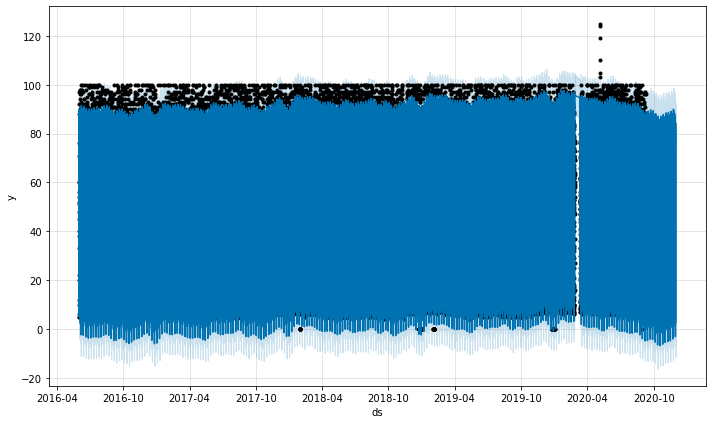

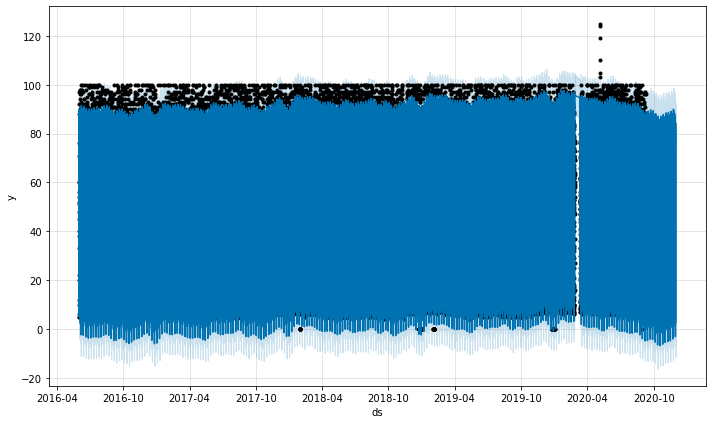

In [69]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)

In [70]:
forecast_mercado_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.313480,80.656580,97.307173,44.313480,44.313480,45.273842,45.273842,45.273842,41.452639,...,1.860363,1.860363,1.860363,1.960840,1.960840,1.960840,0.0,0.0,0.0,89.587322
1,2016-06-01 01:00:00,44.314477,77.024819,94.159087,44.314477,44.314477,41.719634,41.719634,41.719634,37.943463,...,1.810276,1.810276,1.810276,1.965896,1.965896,1.965896,0.0,0.0,0.0,86.034112
2,2016-06-01 02:00:00,44.315475,66.844672,84.660201,44.315475,44.315475,31.396153,31.396153,31.396153,27.656535,...,1.768697,1.768697,1.768697,1.970921,1.970921,1.970921,0.0,0.0,0.0,75.711628
3,2016-06-01 03:00:00,44.316472,51.921446,69.184033,44.316472,44.316472,16.128949,16.128949,16.128949,12.417316,...,1.735720,1.735720,1.735720,1.975914,1.975914,1.975914,0.0,0.0,0.0,60.445421
4,2016-06-01 04:00:00,44.317469,34.685588,51.894236,44.317469,44.317469,-0.985912,-0.985912,-0.985912,-4.678087,...,1.711301,1.711301,1.711301,1.980875,1.980875,1.980875,0.0,0.0,0.0,43.331557


The near-term forecast for the popularity of MercadoLibre is difficult to determine from the charts. 


In [71]:

# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame

forecast_mercado_trends[['yhat_lower', 'yhat_upper', 'yhat']].head()

,yhat_lower,yhat_upper,yhat
ds,,,
2016-06-01 00:00:00,80.656580,97.307173,89.587322
2016-06-01 01:00:00,77.024819,94.159087,86.034112
2016-06-01 02:00:00,66.844672,84.660201,75.711628
2016-06-01 03:00:00,51.921446,69.184033,60.445421
2016-06-01 04:00:00,34.685588,51.894236,43.331557


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

In [72]:

# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
forecast_mercado_trends[['yhat_lower', 'yhat_upper', 'yhat']].iloc[-2000:,:].hvplot()


:NdOverlay   [Variable]
   :Curve   [ds]   (value)

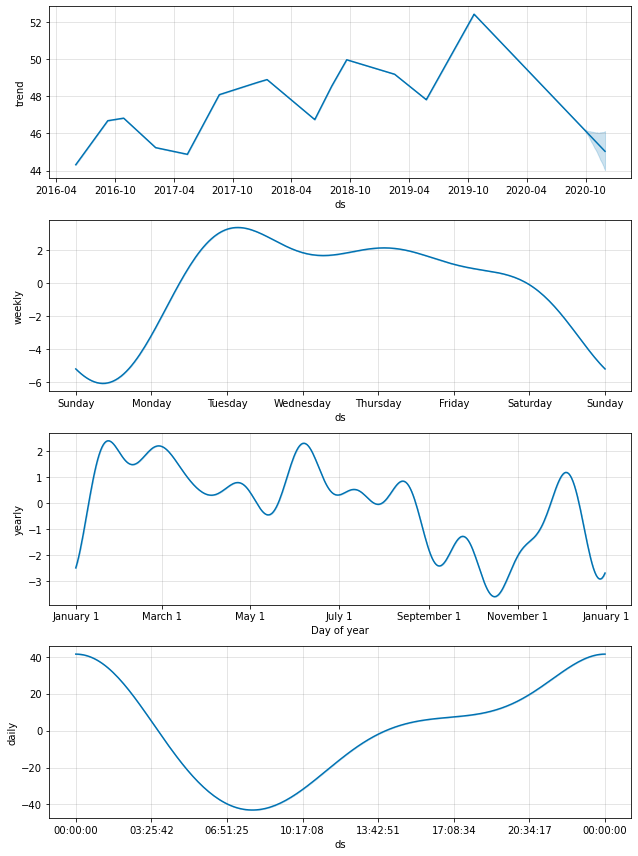

In [34]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
# Help here

figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)

The last hours of the day toward the early morning hours are the times of greatest popularity on MercadoLibre

Tuesday is the day of week that gets the most search traffic.

The lowest point for search traffic in the calendar year is October followed closely by late December, early January.

## Forecast Revenue by Using Time Series Models

In [35]:
# Import "mercado_daily_revenue.csv" file and store in a Pandas DataFrame
# Sales are quoted in millions of US dollars

df_mercado_sales = pd.read_csv(
    Path('Resources/mercado_daily_revenue.csv'),
    index_col="date", 
    parse_dates=True, 
    infer_datetime_format=True
)
    
# Review the DataFrame
df_mercado_sales

,Daily Sales
date,
2019-01-01,0.626452
2019-01-02,1.301069
2019-01-03,1.751689
2019-01-04,3.256294
2019-01-05,3.732920
...,...
2020-05-10,17.467814
2020-05-11,17.537152
2020-05-12,18.031773


In [36]:
# Use hvPlot to visualize the daily sales figures 
df_mercado_sales.hvplot()

:Curve   [date]   (Daily Sales)

In [37]:
# Apply a Facebook Prophet model to the data.

# Set up the dataframe in the neccessary format:
# Reset the index so that date becomes a column in the DataFrame
mercado_sales_prophet_df = df_mercado_sales.reset_index()

# Adjust the columns names to the Prophet syntax
mercado_sales_prophet_df.columns = ['ds', 'y']

# Visualize the DataFrame
mercado_sales_prophet_df.head()

,ds,y
0,2019-01-01,0.626452
1,2019-01-02,1.301069
2,2019-01-03,1.751689
3,2019-01-04,3.256294
4,2019-01-05,3.732920


In [38]:
# Create the model
mercado_sales_prophet_model = Prophet()

# Fit the model
mercado_sales_prophet_model.fit(mercado_sales_prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.33511


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65       1087.08   2.20831e-05       58.8484   4.006e-07       0.001      131  LS failed, Hessian reset 
      99       1087.08   2.18796e-06       91.0817           1           1      185   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       1087.08   1.20326e-06       69.6784    2.52e-08       0.001      241  LS failed, Hessian reset 
     125       1087.08   8.13016e-08       42.2738           1           1      258   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [39]:
# Predict sales for 90 days (1 quarter) out into the future.

# Start by making a future dataframe
mercado_sales_prophet_future = mercado_sales_prophet_model.make_future_dataframe(periods=90, freq='D')

# Display the last five rows of the future DataFrame
mercado_sales_prophet_future.tail()

,ds
585,2020-08-08
586,2020-08-09
587,2020-08-10
588,2020-08-11
589,2020-08-12


In [40]:
# Make predictions for the sales each day over the next quarter
mercado_sales_prophet_forecast = mercado_sales_prophet_model.predict(mercado_sales_prophet_future)

# Display the first 5 rows of the resulting DataFrame
mercado_sales_prophet_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,0.133072,-1.721910,2.060072,0.133072,0.133072,0.063692,0.063692,0.063692,0.063692,0.063692,0.063692,0.0,0.0,0.0,0.196763
1,2019-01-02,0.172253,-1.724592,2.068660,0.172253,0.172253,0.082714,0.082714,0.082714,0.082714,0.082714,0.082714,0.0,0.0,0.0,0.254967
2,2019-01-03,0.211435,-1.749137,2.234939,0.211435,0.211435,0.019566,0.019566,0.019566,0.019566,0.019566,0.019566,0.0,0.0,0.0,0.231001
3,2019-01-04,0.250617,-1.811591,2.141150,0.250617,0.250617,-0.057953,-0.057953,-0.057953,-0.057953,-0.057953,-0.057953,0.0,0.0,0.0,0.192664
4,2019-01-05,0.289799,-1.744900,2.099891,0.289799,0.289799,-0.123892,-0.123892,-0.123892,-0.123892,-0.123892,-0.123892,0.0,0.0,0.0,0.165906


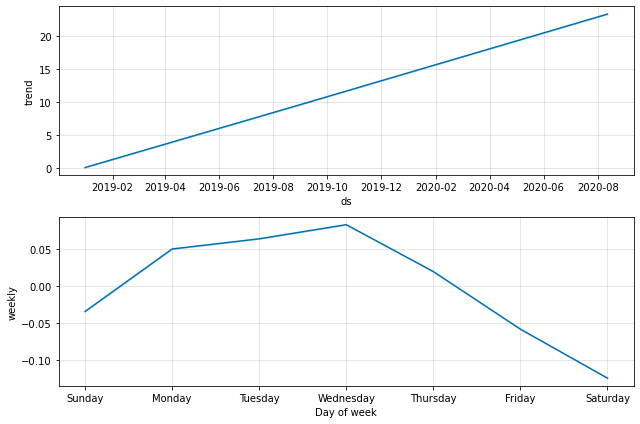

In [42]:
# Use the plot_components function to analyze seasonal patterns in the company's revenue
fig2 = mercado_sales_prophet_model.plot_components(mercado_sales_prophet_forecast)


The peak revenue day is Wednesday and declines from there to the weekend.


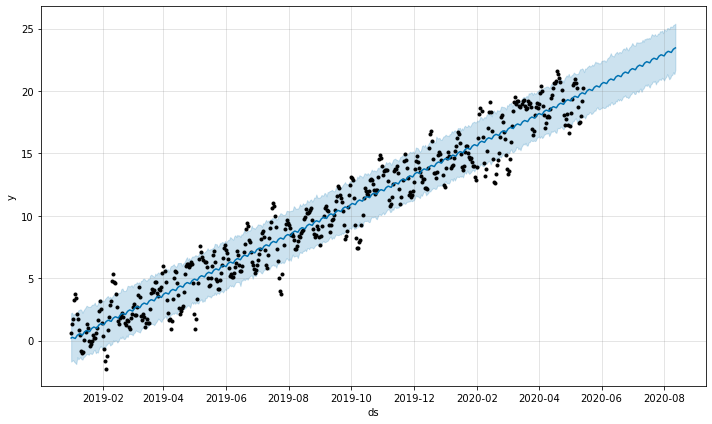

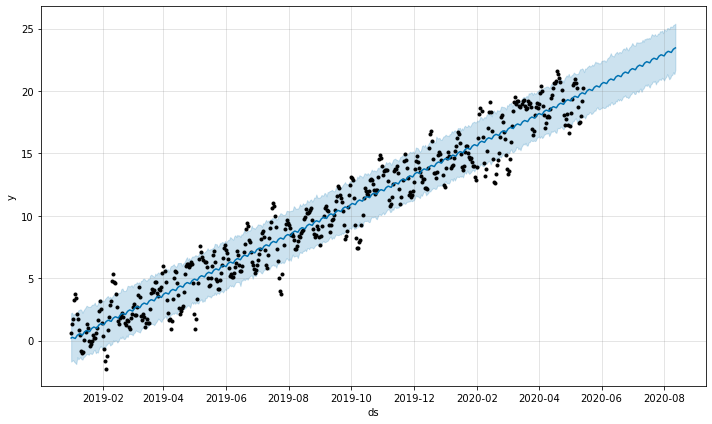

In [94]:
# Plot the predictions for the Mercado sales

mercado_sales_prophet_model.plot(mercado_sales_prophet_forecast)


In [95]:
# For the mercado_sales_prophet_forecast DataFrame, set the ds column as the DataFrame Index
mercado_sales_prophet_forecast = mercado_sales_prophet_forecast.set_index('ds')

# Display the first and last five rows of the DataFrame
display(mercado_sales_prophet_forecast.head())
display(mercado_sales_prophet_forecast.tail())


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2019-01-01,0.133072,-1.693973,2.202813,0.133072,0.133072,0.063692,0.063692,0.063692,0.063692,0.063692,0.063692,0.0,0.0,0.0,0.196763
2019-01-02,0.172253,-1.619262,2.229973,0.172253,0.172253,0.082714,0.082714,0.082714,0.082714,0.082714,0.082714,0.0,0.0,0.0,0.254967
2019-01-03,0.211435,-1.576427,2.016258,0.211435,0.211435,0.019566,0.019566,0.019566,0.019566,0.019566,0.019566,0.0,0.0,0.0,0.231001
2019-01-04,0.250617,-1.715299,2.144140,0.250617,0.250617,-0.057953,-0.057953,-0.057953,-0.057953,-0.057953,-0.057953,0.0,0.0,0.0,0.192664
2019-01-05,0.289799,-1.792441,2.082400,0.289799,0.289799,-0.123892,-0.123892,-0.123892,-0.123892,-0.123892,-0.123892,0.0,0.0,0.0,0.165906


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2020-08-08,23.219502,21.245265,25.160312,23.216588,23.222095,-0.123892,-0.123892,-0.123892,-0.123892,-0.123892,-0.123892,0.0,0.0,0.0,23.095610
2020-08-09,23.259109,21.295545,25.147668,23.256147,23.261749,-0.034132,-0.034132,-0.034132,-0.034132,-0.034132,-0.034132,0.0,0.0,0.0,23.224977
2020-08-10,23.298715,21.520790,25.290521,23.295688,23.301404,0.050005,0.050005,0.050005,0.050005,0.050005,0.050005,0.0,0.0,0.0,23.348720
2020-08-11,23.338322,21.355387,25.329478,23.335237,23.341054,0.063692,0.063692,0.063692,0.063692,0.063692,0.063692,0.0,0.0,0.0,23.402014
2020-08-12,23.377928,21.706670,25.403765,23.374760,23.380713,0.082714,0.082714,0.082714,0.082714,0.082714,0.082714,0.0,0.0,0.0,23.460642


In [97]:
# Expected total sales next quarter.
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.

# Create a forecast_quarter Dataframe for the period 2020-07-01 to 2020-09-30
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
mercado_sales_forecast_quarter = mercado_sales_prophet_forecast['2020-07-01': '2020-09-30'][['yhat_upper', 'yhat_lower', 'yhat']]

# Update the column names for the forecast_quarter DataFrame
mercado_sales_forecast_quarter = mercado_sales_forecast_quarter.rename(columns={'yhat_upper' : 'Best Case', 'yhat_lower' : 'Worst Case', 'yhat' : 'Most Likely'})

# Review the last five rows of the DataFrame
mercado_sales_forecast_quarter.tail()


,Best Case,Worst Case,Most Likely
ds,,,
2020-08-08,25.160312,21.245265,23.095610
2020-08-09,25.147668,21.295545,23.224977
2020-08-10,25.290521,21.520790,23.348720
2020-08-11,25.329478,21.355387,23.402014
2020-08-12,25.403765,21.706670,23.460642


In [98]:
# Displayed the summed values for all the rows in the forecast_quarter DataFrame
mercado_sales_forecast_quarter.sum()


Best Case      1052.159969
Worst Case      887.300374
Most Likely     969.568878
dtype: float64

The total expected sales for next quarter 969.57. The best case scenario shows possible sales of 1052.16 and the worst case scenario shows possible saels of 887.30